In [263]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import seaborn as sns
import pandas as pd
%matplotlib inline

In [154]:
dqf = np.load('../../goesdata/DQF/098/OR_ABI-L1b-RadF-M6C07_G16_s20190980000.npy')

hf = h5py.File('/sharedData2/scratch/label/s20190980000.h5', 'r')
index = hf['label'][()]
data = hf['data'][()]

print(data.shape)
sum(index)

(401401, 4)


91236

In [161]:
dqf_sum = sum(sum(dqf))
sample_sum = sum(index)

In [163]:
np.count_nonzero(index)

52333

In [156]:
sample = np.array(index.reshape(1001,401))

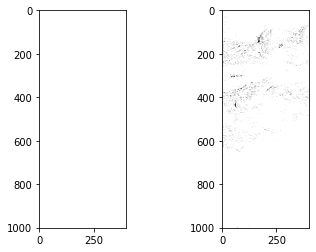

In [157]:
plt.subplot(121)
plt.imshow(dqf, cmap='Greys',  interpolation='nearest')
plt.subplot(122)
plt.imshow(sample, cmap='Greys',  interpolation='nearest')
#plt.savefig('blkwht.png')

plt.show()

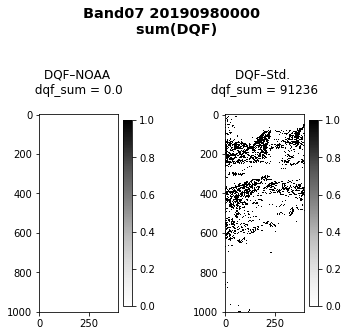

In [158]:
#adjusting min/max mapping values
fig, axs = plt.subplots(1, 2, figsize=(5, 6))
fig.subplots_adjust(wspace=1)
fig.suptitle("Band07 20190980000 \n sum(DQF)",fontsize="x-large", fontweight='bold')

img1 = axs[0].imshow(dqf,cmap='Greys', interpolation='none', vmin = 0, vmax=1)
axs[0].set_title(f'DQF–NOAA \n dqf_sum = {dqf_sum} \n')
fig.colorbar(img1, ax=axs[0], fraction=0.1)


img2 = axs[1].imshow(sample,cmap='Greys', interpolation='none', vmin = 0, vmax=1)
axs[1].set_title(f'DQF–Std. \n dqf_sum = {sample_sum} \n')
fig.colorbar(img2, ax=axs[1], fraction=0.1)

In [159]:
g16 = np.load('../../goesdata/spring_npy/098/OR_ABI-L1b-RadF-M6C07_G16_s20190980000')
g17 = np.load('../../goesdata/spring_npy/098/OR_ABI-L1b-RadF-M6C07_G17_s20190980000')

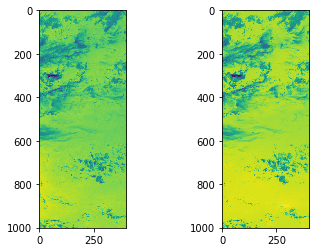

In [160]:
plt.subplot(121)
plt.imshow(g16,  interpolation='nearest')
plt.subplot(122)
plt.imshow(g17,  interpolation='nearest')
#plt.savefig('blkwht.png')

plt.show()

In [165]:
np.unique(sample)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [269]:
x = [[ 97.32,1.7, 0.68, 0.14, 0.15],
     [ 34.7, 30.7, 24.28, 4.91, 5.41],
     [ 31.46, 27.83, 22.0, 8.9, 9.8],
     [ 28.44, 25.16, 12.58, 16.1, 17.72]
    ]

y =  [[99.99, 1.39, 0.22, 0.07, 0],
      [83.1, 46.0, 47.12, 0, 0],
      [82.81, 45.63, 42.95, 32.29, 17.76],
      [81.88, 55.89, 0.07, 5.73, 55.14]
    ]
dqf_class = ['Class 0','Class 1','Class 2','Class 3','Class 4']

ValueError: 'c' argument has 4 elements, which is not acceptable for use with 'x' with size 20, 'y' with size 20.

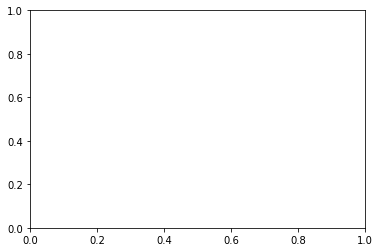

In [188]:
plt.scatter(x,y, c=['b','r','g','y'])
#plt.scatter?

In [270]:
df1= pd.DataFrame({'x0':np.array(x)[0], 
                   'x1':np.array(y)[0],
                   'y': dqf_class,
                   'target':(np.array(['Blue','Red','Green','Yellow','Purple'])[[0,1,2,3,4]]).T})
df2= pd.DataFrame({'x0':np.array(x)[1], 
                   'x1':np.array(y)[1],
                   'y': dqf_class,
                   'target':(np.array(['Blue','Red','Green','Yellow','Purple'])[[0,1,2,3,4]]).T})
df3= pd.DataFrame({'x0':np.array(x)[2], 
                   'x1':np.array(y)[2],
                   'y': dqf_class,
                   'target':(np.array(['Blue','Red','Green','Yellow','Purple'])[[0,1,2,3,4]]).T})
df4= pd.DataFrame({'x0':np.array(x)[3], 
                   'x1':np.array(y)[3],
                   'y': dqf_class,
                   'target':(np.array(['Blue','Red','Green','Yellow','Purple'])[[0,1,2,3,4]]).T})
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df
column ={'x0':'Percent Sample','x1':'Recall','y':'Class target','target':'Color'}
df = df.rename(columns= column)
df
# d= df[1:]
# d
# df = pd.DataFrame(pd, column=[])

,Percent Sample,Recall,Class target,Color
0,97.32,99.99,Class 0,Blue
1,1.70,1.39,Class 1,Red
2,0.68,0.22,Class 2,Green
3,0.14,0.07,Class 3,Yellow
4,0.15,0.00,Class 4,Purple
0,34.70,83.10,Class 0,Blue
1,30.70,46.00,Class 1,Red
2,24.28,47.12,Class 2,Green
3,4.91,0.00,Class 3,Yellow
4,5.41,0.00,Class 4,Purple


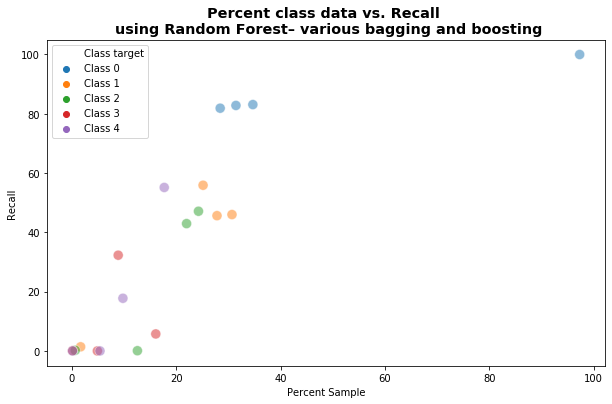

In [271]:
fig, ax = plt.subplots(1,figsize=(10,6))
_=sns.scatterplot(x='Percent Sample',y='Recall',hue='Class target', data=df,ax=ax,alpha=.5,s=100)
ax.set_title('Percent class data vs. Recall \n using Random Forest– various bagging and boosting',
             fontsize="x-large", fontweight='bold');

In [212]:
np.array(['Blue','Red','Green','Yellow'])[[0,1,2,3,4]].shape

(5,)

In [213]:
np.array(x).T[0]

array([97.32, 34.7 , 31.46, 28.44])

In [221]:
np.array([(np.array(['Blue','Red','Green','Yellow','Purple'])[[0,1,2,3,4]]).T]*4)

array([['Blue', 'Red', 'Green', 'Yellow', 'Purple'],
       ['Blue', 'Red', 'Green', 'Yellow', 'Purple'],
       ['Blue', 'Red', 'Green', 'Yellow', 'Purple'],
       ['Blue', 'Red', 'Green', 'Yellow', 'Purple']], dtype='<U6')

In [224]:
[np.array([(np.array(['Blue','Red','Green','Yellow','Purple'])[[0,1,2,3,4]]).T]*4)]

[array([['Blue', 'Red', 'Green', 'Yellow', 'Purple'],
        ['Blue', 'Red', 'Green', 'Yellow', 'Purple'],
        ['Blue', 'Red', 'Green', 'Yellow', 'Purple'],
        ['Blue', 'Red', 'Green', 'Yellow', 'Purple']], dtype='<U6')]